In [1]:
#pip install mlxtend

In [2]:
#pip install wordcloud

In [3]:
import numpy as np 
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_excel('D:\downloads\groceries.xlsx' , header = None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
# size of dataset 

There are 9835 rows and 32 columns


In [5]:
df
#Showing Dataset 
#Filled with NaN values 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,0,0,0,0,0,0,0,0,0,0
9831,cooking chocolate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,0,0,0,0,0,0,0,0,0,0
9833,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.sample(10)
# Some random rows from dataset 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
692,curd,UHT-milk,artif. sweetener,dental care,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8265,beverages,processed cheese,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6042,semi-finished bread,long life bakery product,waffles,detergent,newspapers,shopping bags,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5618,whole milk,brown bread,dog food,chocolate,hygiene articles,potted plants,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7176,finished products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4394,onions,other vegetables,whole milk,butter,butter milk,whipped/sour cream,ice cream,rolls/buns,bottled beer,long life bakery product,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5766,turkey,beef,semi-finished bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,tropical fruit,root vegetables,frozen vegetables,ice cream,bottled water,cling film/bags,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3947,pork,root vegetables,other vegetables,mayonnaise,domestic eggs,rolls/buns,mustard,fruit/vegetable juice,chewing gum,dishes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,whole milk,curd,soda,light bulbs,potted plants,shopping bags,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
items = (df[0].unique())

for i in items:
    print(i)
    
#Finding unique items in column 1 (Mostly having all the unique items )

citrus fruit
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
potted plants
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
f

In [9]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
encod_df = pd.DataFrame(encoded_vals)

#Encoding values 

encod_df

,chicken,artif. sweetener,instant coffee,Instant food products,salty snack,pickled vegetables,curd cheese,potted plants,newspapers,finished products,...,sliced cheese,bottled beer,chocolate marshmallow,syrup,onions,red/blush wine,cereals,margarine,citrus fruit,semi-finished bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [11]:
freq_items = fpgrowth(encod_df , min_support = 0.005 , use_colnames = True)
freq_items

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
995,0.005491,"(meat, soda)"
996,0.005084,"(meat, root vegetables)"
997,0.005287,"(meat, sausage)"
998,0.005287,"(meat, yogurt)"


In [12]:
most_popular_items=freq_items.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items
#Top 15 most frequent items

,support,itemsets
6,0.255516,(whole milk)
9,0.193493,(other vegetables)
13,0.183935,(rolls/buns)
26,0.174377,(soda)
3,0.139502,(yogurt)
19,0.110524,(bottled water)
38,0.108998,(root vegetables)
4,0.104931,(tropical fruit)
46,0.098526,(shopping bags)
45,0.093950,(sausage)


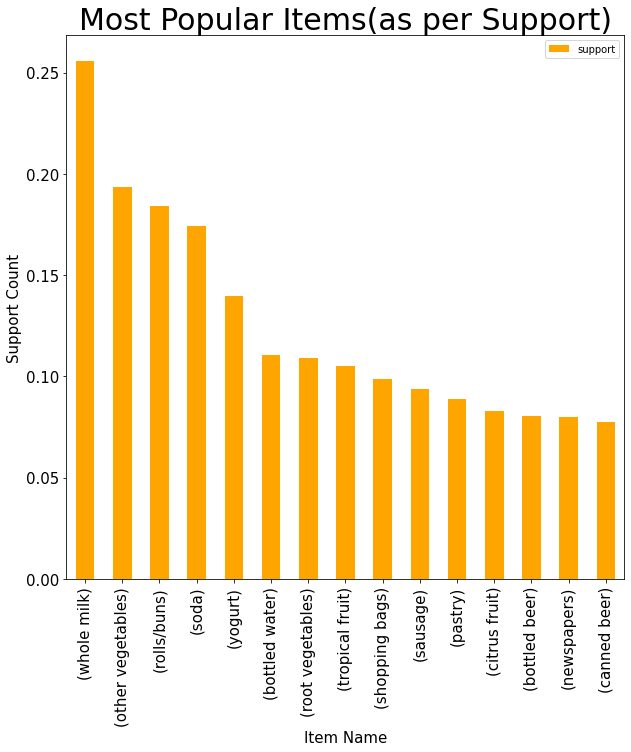

In [13]:
most_popular_items.values.tolist()

plt.rcParams['figure.figsize']=(10,10)
most_popular_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
1,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
2,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
3,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
4,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,0.011244,1.178942
...,...,...,...,...,...,...,...,...,...
95,"(citrus fruit, other vegetables)",(rolls/buns),0.028876,0.183935,0.005999,0.207746,1.129456,0.000688,1.030055
96,"(citrus fruit, rolls/buns)",(other vegetables),0.016777,0.193493,0.005999,0.357576,1.848007,0.002753,1.255412
97,"(other vegetables, rolls/buns)",(citrus fruit),0.042603,0.082766,0.005999,0.140811,1.701328,0.002473,1.067559
98,(citrus fruit),"(other vegetables, rolls/buns)",0.082766,0.042603,0.005999,0.072482,1.701328,0.002473,1.032214


In [15]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction
340,"(yogurt, root vegetables, tropical fruit)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613
526,"(pip fruit, root vegetables, other vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720
711,"(butter, whipped/sour cream)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659
2054,"(pip fruit, whipped/sour cream)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126
655,"(yogurt, butter)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
701,"(butter, root vegetables)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
952,"(tropical fruit, curd)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240
80,"(root vegetables, citrus fruit, whole milk)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566
451,"(yogurt, pip fruit, other vegetables)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291
2259,"(domestic eggs, pip fruit)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536


In [16]:
#pip install matplotlib

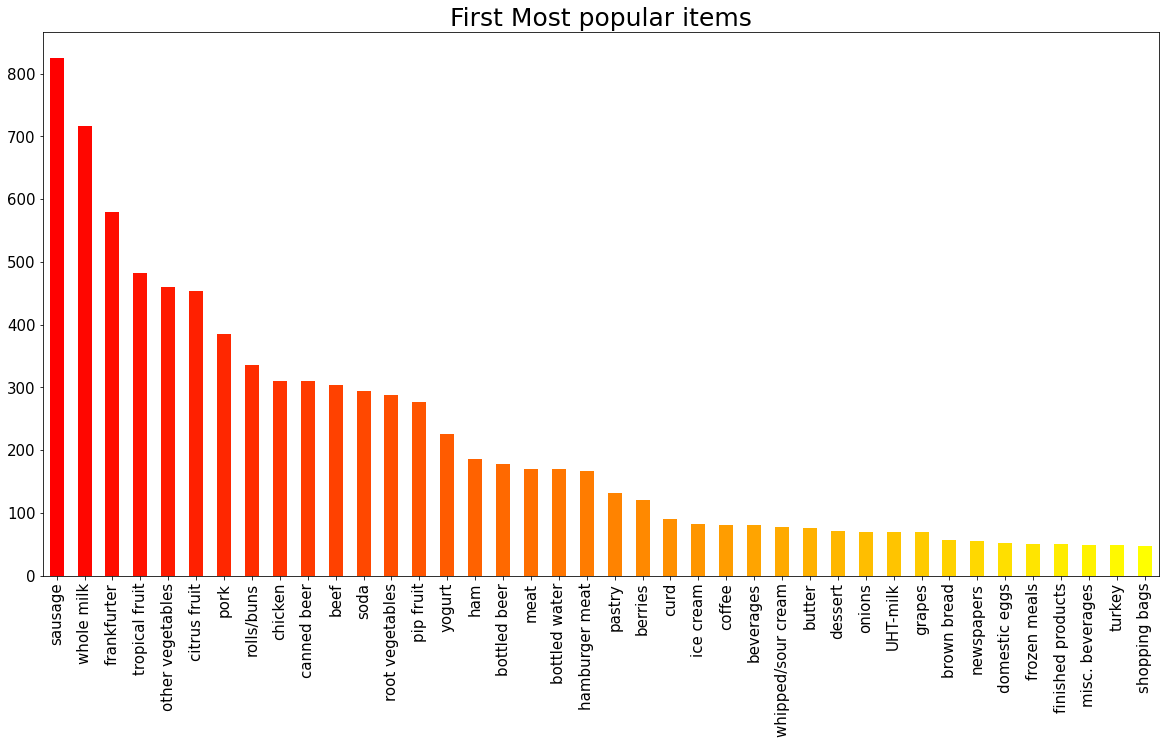

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid()

plt.show()

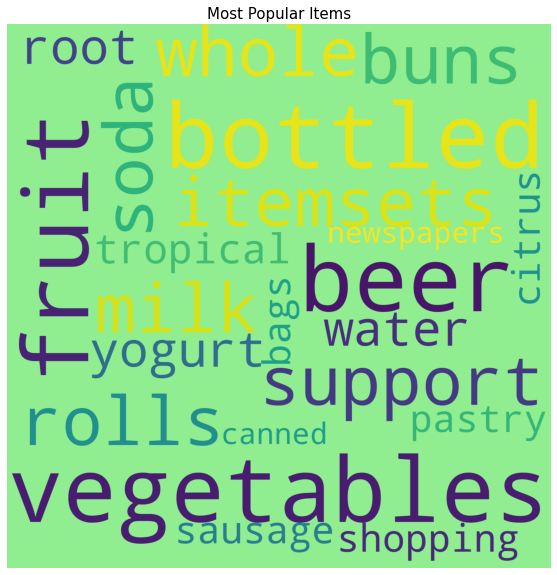

In [23]:
plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color = 'lightgreen', width = 1500, height = 1500, max_words = 121).generate(str(most_popular_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

In [19]:
file = pd.ExcelWriter('Desktop\Rules.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(100).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()

In [20]:
# association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.2)
# a_confi_top=association_confi.sort_values('confidence',ascending=False)
# a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

In [21]:
association_supp=association_rules(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head()

,antecedents,consequents,support,confidence,lift,leverage,conviction
2,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
3,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
4,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
0,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132


In [22]:
association_lift=association_rules(freq_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction
58,"(tropical fruit, whole milk)","(yogurt, root vegetables)",0.005694,0.134615,5.212371,0.004602,1.125712
53,"(yogurt, root vegetables)","(tropical fruit, whole milk)",0.005694,0.220472,5.212371,0.004602,1.228567
55,"(yogurt, whole milk)","(root vegetables, tropical fruit)",0.005694,0.101633,4.828814,0.004515,1.089703
56,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.005694,0.270531,4.828814,0.004515,1.294059
89,"(pip fruit, root vegetables)","(other vegetables, whole milk)",0.005491,0.352941,4.716272,0.004326,1.429801
94,"(other vegetables, whole milk)","(pip fruit, root vegetables)",0.005491,0.073370,4.716272,0.004326,1.062390
204,(ham),(white bread),0.005084,0.195312,4.639851,0.003988,1.190407
205,(white bread),(ham),0.005084,0.120773,4.639851,0.003988,1.107758
43,"(root vegetables, tropical fruit)","(other vegetables, whole milk)",0.007016,0.333333,4.454257,0.005441,1.387748
46,"(other vegetables, whole milk)","(root vegetables, tropical fruit)",0.007016,0.093750,4.454257,0.005441,1.080224
